# Pandas Lab Assignment - Diamonds

The following csv data file contains data of diamonds with following characteristics.

carat - diamond's apparent size <br>
cut - how good the diamond shaping is <br>
color - colour of a diamond as letter representation <br>
clarity - clarity of diamond <br>
depth - depth of diamond <br>
table - top surface of diamond <br>
price - price of diamond <br>
x - x dimension <br>
y - y dimension<br>
z - z dimension <br>

Read the file and find the following:

1. Drop the unnamed column from the dataset once you read it  
2. The occurences of all unique colors of diamonds, bar chart of the same.     
3. Average price of each cut of diamond.  
4. Find the volume of every diamond and store it in a new column in the dataset. (volume = x*y*z)   
5. Histograms of Price and depths colums as two separate plots  
6. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.  
7. Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only  
8. Which clarity(i.e the category) diamond has maximum mean depth?  
9. Find the diamond(i.e row) with minimum price per volume

In [2]:
import pandas as pd
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### 1.Drop the unnamed column from the dataset once you read it

In [4]:
df.columns 

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
data= df.drop(['Unnamed: 0'], axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 2.The occurences of all unique colors of diamonds, bar chart of the same.

In [6]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [7]:
datacolor = data['color'].value_counts()
print(datacolor)

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


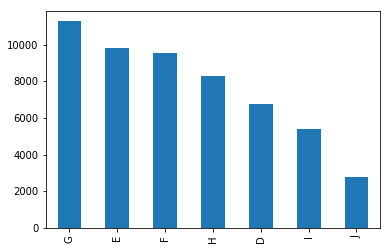

In [8]:
import matplotlib.pyplot as plt
datacolor.plot(kind='bar')
plt.show()

### 3.Average price of each cut of diamond.

In [8]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
data2=data[['cut','price']]
for name, value in data2.groupby('cut'):
    print('Cut type:',name)
    print('Avg price:',value['price'].mean())
    print('\n')
    #print('Average price of {0} is {1}'.format(name, value['price'].mean()))

Cut type: Fair
Avg price: 4358.757763975155


Cut type: Good
Avg price: 3928.864451691806


Cut type: Ideal
Avg price: 3457.541970210199


Cut type: Premium
Avg price: 4584.2577042999055


Cut type: Very Good
Avg price: 3981.7598907465654




### 4.Find the volume of every diamond and store it in a new column in the dataset. (volume = xyz)

In [10]:
data['volume']=(data['x'])*(data['y'])*(data['z'])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


### Histograms of Price and depths colums as two separate plot

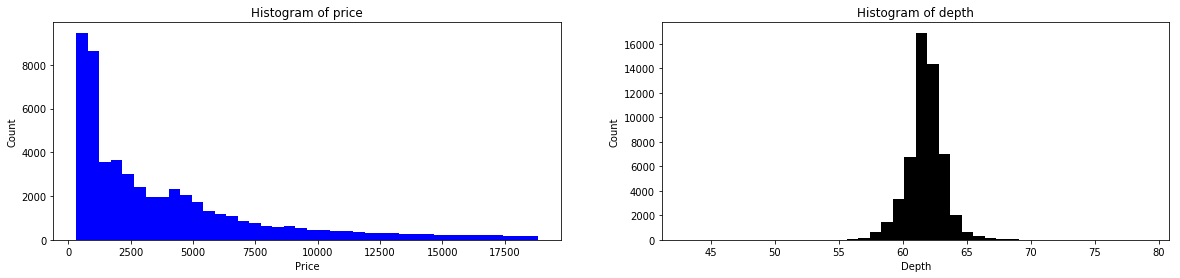

In [21]:
import matplotlib.pyplot as plt
dataprice = data['price']
datadepth = data['depth']

plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
plt.hist(dataprice,40, color='b')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram of price')

plt.subplot(1,2,2)
plt.hist(datadepth,40,color='k')
plt.xlabel('Depth')
plt.ylabel('Count')
plt.title('Histogram of depth')

plt.show()

### A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.

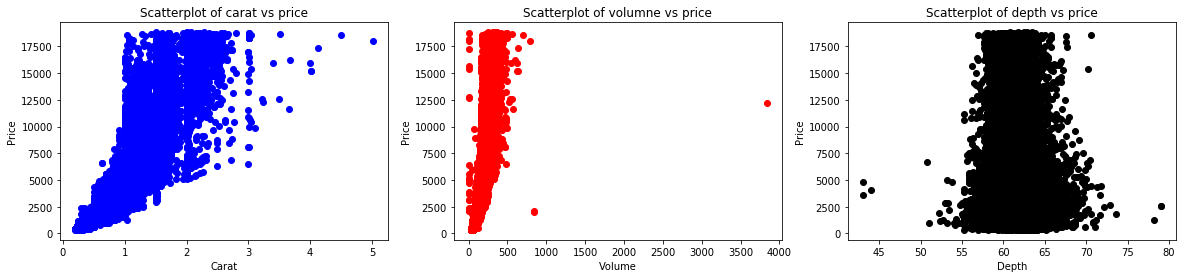

In [12]:
datacarat=data['carat']
dataprice= data['price']
datadepth= data['depth']
datavolume=data['volume']

plt.figure(figsize=[20,4])
plt.subplot(1,3,1)
plt.scatter(datacarat,dataprice, color='b')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatterplot of carat vs price')


plt.subplot(1,3,2)
plt.scatter(datavolume, dataprice, color='r')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('Scatterplot of volumne vs price')


plt.subplot(1,3,3)
plt.scatter(datadepth, dataprice, color='k')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.title('Scatterplot of depth vs price')

plt.show()

### Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only

In [13]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [14]:
dict1={'D':0,'E':1,'F':2,'H':3,'I':4,'J':5,'G':6}
#data2= data
data['newcolor'] = data['color'].apply(lambda x:dict1[x]) 
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,newcolor
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,5


In [15]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,newcolor
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,5


In [16]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [17]:
data['newcolor'].unique()

array([1, 4, 5, 3, 2, 6, 0], dtype=int64)

### Which clarity(i.e the category) diamond has maximum mean depth?

In [18]:
list1=[]
dict1={}
import pandas as pd
data2=data[['clarity','depth']]
for name, value in data2.groupby('clarity'):
    #print(name)
    #print(value['depth'].mean())
    a=value['depth'].mean()
    print(a)
    dict1[name]=value['depth'].mean()
    #data3=pd.DataFrame(a)
    list1.append(a)
    #print(list1)
    #data3.mean()
    #print(data2['test'])
    #z=data2['test'].max()
x=max(dict1.values())
for key in dict1:
    if(dict1[key]== x):
        print('Name of the clarity type for max mean depth is:', key)
        print('Max mean depth is:', x)
    
  
    
    
    


62.73427800269906
61.510614525139665
61.853042479908154
61.77216663041114
61.66745808346592
61.724416707456356
61.6246511627907
61.663778128701146
Name of the clarity type for max mean depth is: I1
Max mean depth is: 62.73427800269906


## Find the diamond(i.e row) with minimum price per volume

In [19]:
data['pricepervolume']=(data['price']/data['volume'])
a=data['pricepervolume'].min()
for name, value in data.groupby(data['pricepervolume']):
    if(name==a):
        print(value)

       carat        cut color clarity  depth  table  price     x     y     z  \
48410   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12  5.15  31.8   

         volume  newcolor  pricepervolume  
48410  838.5024         1        2.349427  
